In [1]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')
PG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.625000,15.437500,15.468750,15.593750,3318400.0,6.320252
1995-01-04,15.656250,15.312500,15.531250,15.468750,2218800.0,6.269589
1995-01-05,15.437500,15.218750,15.375000,15.250000,2319600.0,6.180927
1995-01-06,15.406250,15.156250,15.156250,15.281250,3438000.0,6.193593
1995-01-09,15.406250,15.187500,15.343750,15.218750,1795200.0,6.168259
...,...,...,...,...,...,...
2020-05-04,117.199997,115.000000,117.089996,115.769997,5636000.0,115.769997
2020-05-05,117.260002,115.209999,115.800003,116.010002,5425200.0,116.010002
2020-05-06,116.139999,112.889999,115.540001,113.099998,7892200.0,113.099998


In [3]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,6.320252
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,6.269589
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,6.180927
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,6.193593
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,6.168259


In [4]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-04,117.199997,115.000000,117.089996,115.769997,5636000.0,115.769997
2020-05-05,117.260002,115.209999,115.800003,116.010002,5425200.0,116.010002
2020-05-06,116.139999,112.889999,115.540001,113.099998,7892200.0,113.099998
2020-05-07,114.139999,111.820000,114.059998,112.169998,8762800.0,112.169998
2020-05-08,116.300003,113.389999,113.519997,115.949997,9279900.0,115.949997


## Simple Rate of Return

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [5]:
PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1
print (PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2020-05-04   -0.008988
2020-05-05    0.002073
2020-05-06   -0.025084
2020-05-07   -0.008223
2020-05-08    0.033699
Name: simple_return, Length: 6383, dtype: float64


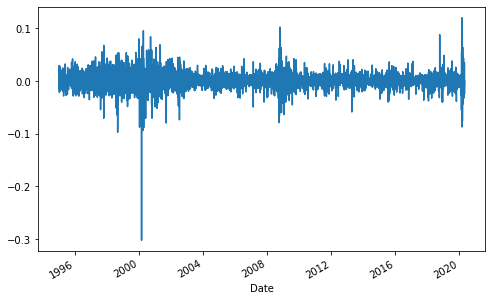

In [6]:
PG['simple_return'].plot(figsize=(8, 5))
plt.show()

In [ ]:
#Quite often positive returns have been followed by negative returns.
#As you can see the most significant daily observations were mainly negative.
#In finance we are accustomed to seeing negative returns that have a much higher magnitude of positive 
#returns usually positive returns accumulate over time and stock prices increase.
#But when things do go wrong stock prices tend to fall very quickly.
#As you can see here a loss of 30 percent in a single day (2000).

In [7]:
#calculate the mean return of P and G throughout the period under analysis
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

0.000559882734832951

In [8]:
#Multiply the average daily return by 250 and we'll obtain a very close approximation of the actual average return per year 
avg_returns_a = PG['simple_return'].mean() * 250
avg_returns_a

0.13666719612643813

In [9]:
#Round it a little to make it more presentable. Multiply it by a hundred. 
#Turn it into a string and finally add the percentage sign at the end.
print (str(round(avg_returns_a, 5) * 100) + ' %')

13.667000000000002 %
